In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from openbb_terminal.sdk import openbb
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

In [124]:
usd_cnh = pd.read_csv("C:/Users/anton/Documents/data/China/USD_CNH_Historical.csv")
usd_cny = pd.read_csv("C:/Users/anton/Documents/data/China/USD_CNY_Historical.csv")
parity_rate = pd.read_csv("C:/Users/anton/Documents/data/China/Central_Parity_Historical_Data.csv")
usdcny_2000 = pd.read_csv("C:/Users/anton/Documents/data/China/2000_2024.csv")

In [125]:
parity_rate.index = pd.to_datetime(parity_rate["Date"])
parity_rate = parity_rate[["USD/CNY"]]

usd_cny.index = pd.to_datetime(usd_cny["Date"])
usd_cny = usd_cny[["Close","Open","High","Low", "pct_change", "log_return"]].dropna()

usd_cnh.index = pd.to_datetime(usd_cnh["Date"])
usd_cnh = usd_cnh[["Close","Open","High","Low", "pct_change", "log_return"]].dropna()

usdcny_2000.index = pd.to_datetime(usdcny_2000["Date"])
usdcny_2000 = usdcny_2000[["Close","Open","High","Low", "pct_change", "log_return"]].dropna()

In [129]:
#concatenated_df = pd.concat([usdcny_2000[usdcny_2000.index <= '2019-03-01'], usd_cny[usd_cny.index > '2019-03-01']])
#concatenated_df.to_csv("C:/Users/anton/Documents/data/China/2000_2024.csv")

In [130]:
#usd_cnh.index = pd.to_datetime(usd_cnh["Date"])
#usd_cnh.rename(columns = {"Price": "Close"}, inplace = True)
#usd_cnh =usd_cnh[::-1]
#usd_cnh = usd_cnh[["Close", "Open", "High", "Low"]]
#usd_cnh['pct_change'] = usd_cnh["Close"].pct_change()
#usd_cnh['log_return'] = np.log(usd_cnh["Close"]) - np.log(usd_cnh["Close"].shift(1))
#usd_cnh.to_csv("C:/Users/anton/Documents/data/China/USD_CNH_Historical.csv")

#usdcny_2000.index = pd.to_datetime(usdcny_2000["Date"])
#usdcny_2000.rename(columns = {"Price": "Close"}, inplace = True)
#usdcny_2000 =usdcny_2000[::-1]
#usdcny_2000 = usdcny_2000[["Close", "Open", "High", "Low"]]
#usdcny_2000['pct_change'] = usdcny_2000["Close"].pct_change()
#usdcny_2000['log_return'] = np.log(usdcny_2000["Close"]) - np.log(usdcny_2000["Close"].shift(1))
#usdcny_2000.to_csv("C:/Users/anton/Documents/data/China/usdcny_2000_Historical.csv")

#usd_cny.index = pd.to_datetime(usd_cny["Date"])
#usd_cny = usd_cny[["Price"]]
#usd_cny.rename(columns = {"Price": "Close"}, inplace = True)
#usd_cny = usd_cny[["Close", "Open", "High", "Low"]]
#usd_cny =usd_cny[::-1]
#usd_cny['pct_change'] = usd_cny["Close"].pct_change()
#usd_cny['log_return'] = np.log(usd_cny["Close"]) - np.log(usd_cny["Close"].shift(1))
#usd_cny.to_csv("C:/Users/anton/Documents/data/China/USD_CNY_Historical.csv")

#parity_rate['Date'] = pd.to_datetime(parity_rate['Date'])
#parity_rate.index = parity_rate['Date']
#parity_rate = parity_rate[['USD/CNY']] [::-1]
#parity_rate.index = parity_rate["Date"]
#parity_rate = parity_rate[["USD/CNY"]]
#parity_rate.to_csv("C:/Users/anton/Documents/data/China/Central_Parity_Historical_Data.csv")

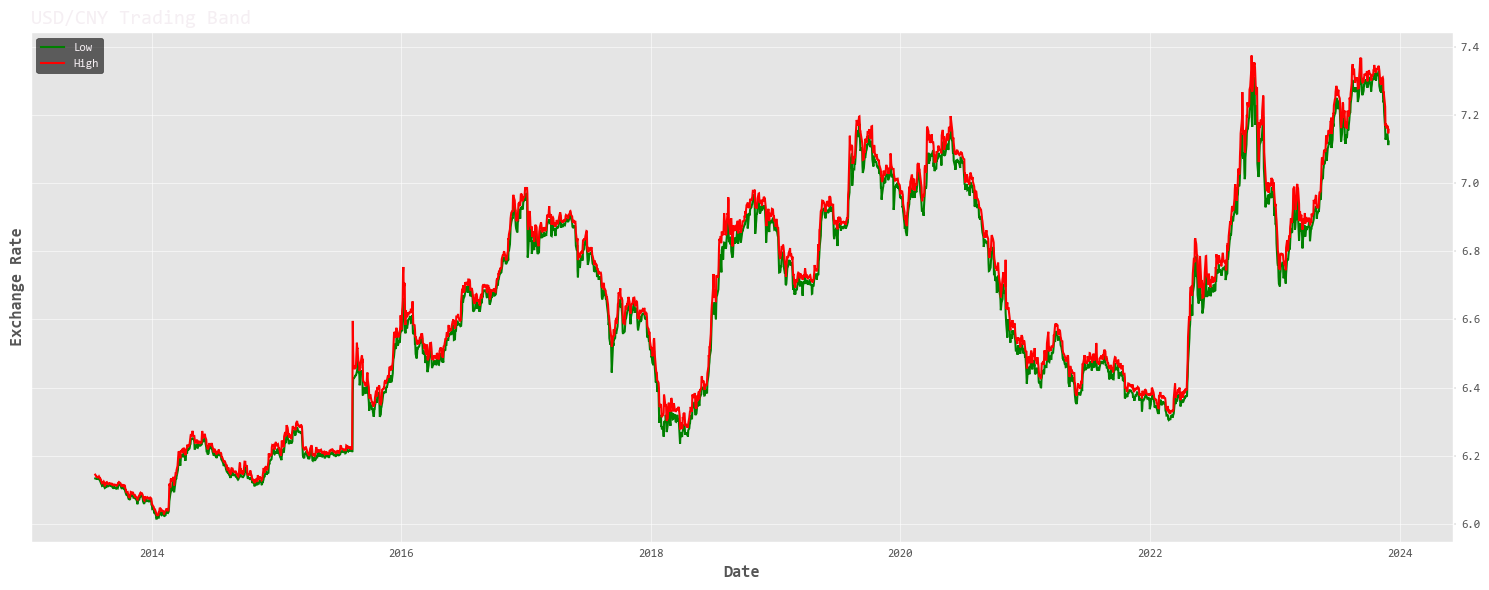

In [131]:
filtered_data = usd_cnh #[usd_cny.index > "2023-05-01"]
dates = filtered_data.index

low_values = filtered_data['Low']
high_values = filtered_data['High']

plt.plot(low_values, label='Low', color='green')
plt.plot(high_values, label='High', color='red')

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD/CNY Trading Band')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

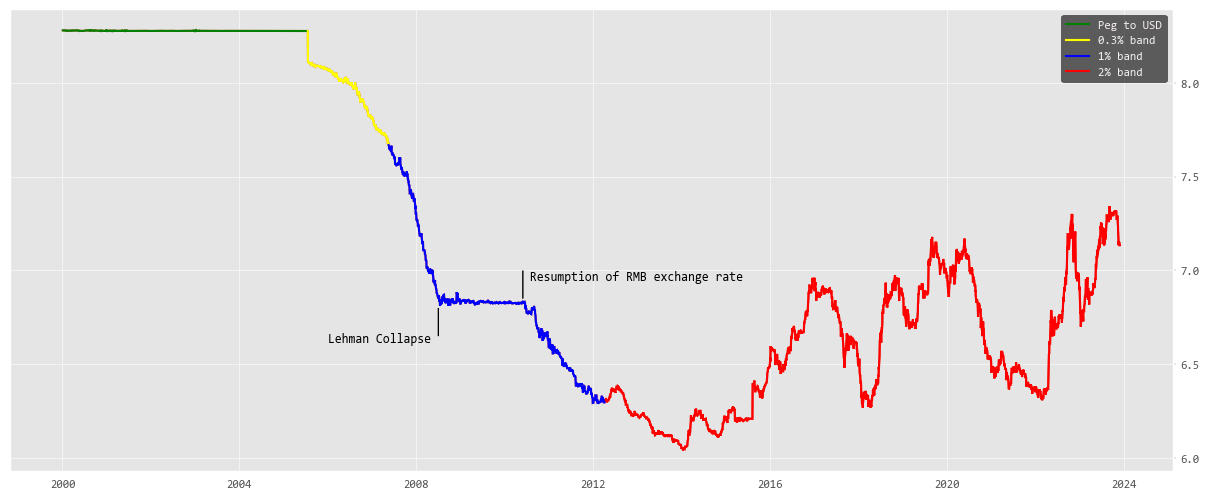

In [248]:
plt.plot(usdcny_2000["Close"])
plt.plot(usdcny_2000.loc['1999-01-01':'2005-07-20']['Close'], "green", label = """Peg to USD""")
plt.plot(usdcny_2000.loc['2005-07-20':'2007-05-17']['Close'], "yellow", label = """0.3% band""")
plt.plot(usdcny_2000.loc['2007-05-18':'2012-04-13']['Close'], "blue", label = """1% band""")
plt.plot(usdcny_2000.loc['2012-04-14':'2023-12-12']['Close'], "red", label = """2% band""")

points_to_label = {
    '2008-07-01': (6.6, 'Lehman Collapse '), # - pegged again
    '2010-06-01': (7, 'Resumption of RMB exchange rate')
}

plt.arrow(pd.to_datetime('2008-07-01'), 6.65, 0, 0.1, head_width=0.1, head_length=0.05, fc='black', ec='black')
plt.text(pd.to_datetime('2008-07-01'), 6.6, f' {points_to_label["2008-07-01"][1]}', fontsize=9, ha='right', va='bottom', color="black")

plt.arrow(pd.to_datetime('2010-06-01'), 6.85, 0, 0.1, head_width=0.1, head_length=0.05, fc='black', ec='black')
plt.text(pd.to_datetime('2010-06-01'), 7, f' {points_to_label["2010-06-01"][1]}', fontsize=9, ha='left', va='top', color="black")


plt.legend(loc = "best")

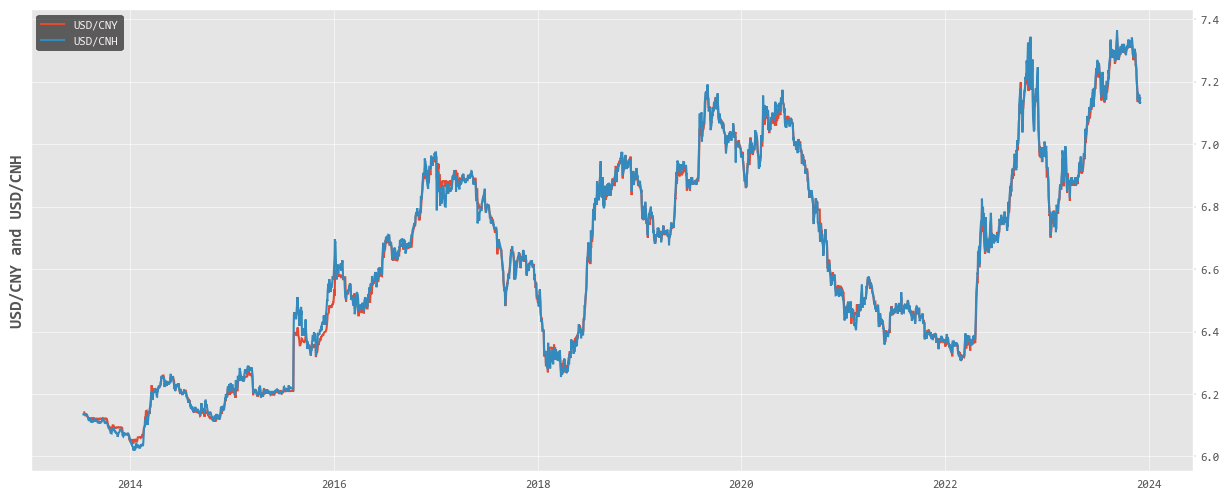

In [254]:
fig, ax1 = plt.subplots()
ax1.plot(usd_cny[usd_cny.index > "2013-07-19"]["Close"], label="USD/CNY")
ax1.plot(usd_cnh["Close"], label="USD/CNH")
ax1.set_ylabel('USD/CNY and USD/CNH')
ax1.legend(loc="upper left")
plt.show()

In [137]:
forward = openbb.forex.fwd(from_symbol = "USD", to_symbol = "CNH")

INFO:openbb_terminal.forex.fxempire_model:START
INFO:openbb_terminal.forex.fxempire_model:END


In [140]:
time_periods = {
    'Overnight': 1 / 365,
    'Tomorrow Next': 2 / 365,
    'One Week': 7 / 365,
    'Two Weeks': 14 / 365,
    'One Month': 30 / 365,
    'Two Months': 60 / 365,
    'Three Months': 90 / 365,
    'Six Months': 180 / 360,
    'Nine Months': 270 / 360,
    'One Year': 1,
    'Two Years': 2,
    'Three Years': 3
}

forward['Numeric Expiration'] = forward.index.map(time_periods)
forward['time_exp'] = forward.index.map(time_periods)

In [141]:
current_date = datetime(2023, 11, 29)
forward['Actual Expiration'] = current_date + pd.to_timedelta(forward['Numeric Expiration'] * 365, unit='D')

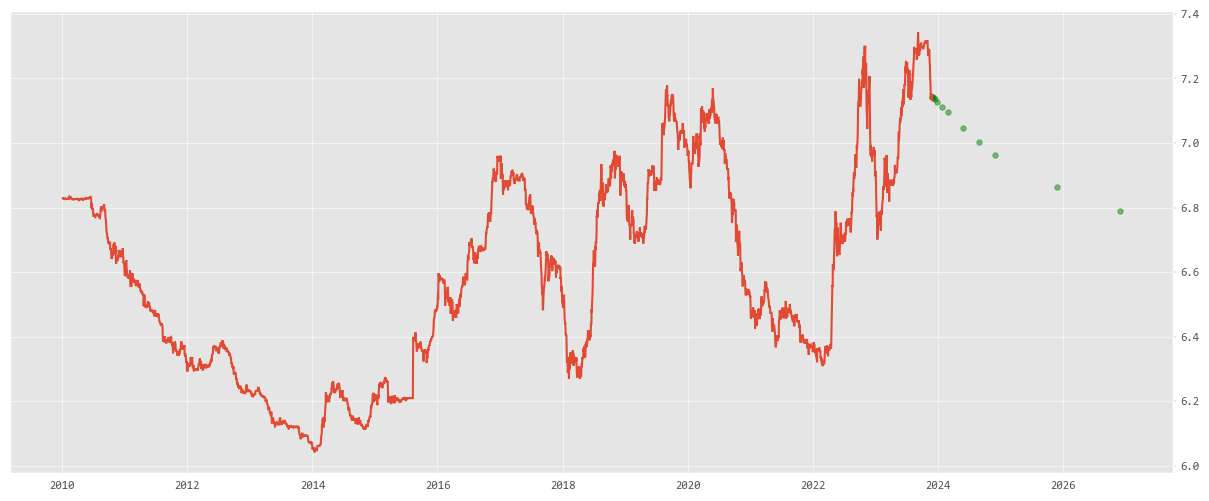

In [447]:
plt.plot(usd_cny["Close"], label="USD/CNY") 
plt.scatter(x = forward["Actual Expiration"], y = forward["Mid"], color = "green", alpha = 0.5);

In [150]:
spread = usd_cnh["Close"] - usd_cny["Close"] 

In [244]:
import pickle

In [245]:
with open('spread.pickle', 'wb') as file:
    pickle.dump(spread, file)

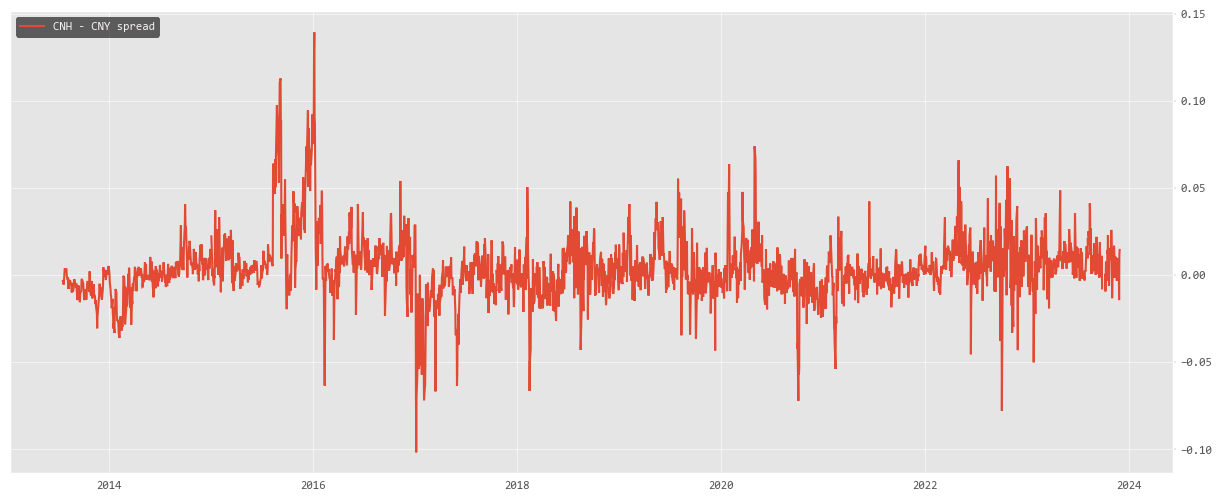

In [258]:
plt.plot(spread, label = "CNH - CNY spread");
ax1.set_ylabel('CNH-CNY spread')
ax1.legend(loc="upper left")
plt.legend();

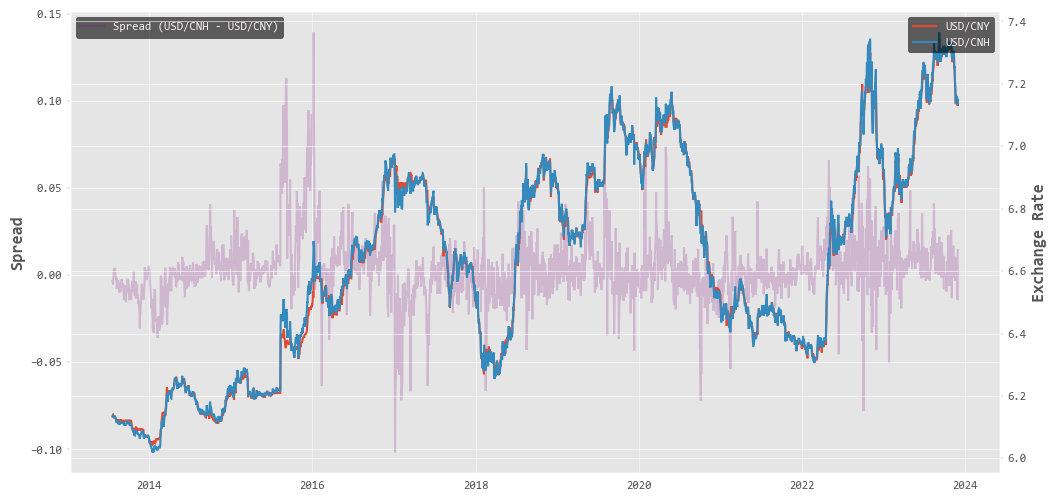

In [268]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(spread, label='Spread (USD/CNH - USD/CNY)', color = "purple", alpha =0.2)
ax1.set_ylabel('Spread') #, color='blue'
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.plot(usd_cny[usd_cny.index > "2013-07-19"]["Close"], label="USD/CNY")
ax2.plot(usd_cnh["Close"], label='USD/CNH')
ax2.set_ylabel('Exchange Rate')
ax2.tick_params(axis='y') #, labelcolor='green'
ax2.legend(loc='upper right');

### Vol

In [155]:
from historical_volatility import *

In [156]:
eur_usd  = openbb.forex.load(from_symbol="EUR", to_symbol="USD", start_date="2013-07-18", end_date="2023-11-29")
usd_pln  = openbb.forex.load(from_symbol="USD", to_symbol="PLN", start_date="2013-07-18", end_date="2023-11-29")
eur_pln  = openbb.forex.load(from_symbol="EUR", to_symbol="PLN", start_date="2013-07-18", end_date="2023-11-29")

INFO:openbb_terminal.forex.forex_helper:START
INFO:openbb_terminal.forex.forex_helper:{"INPUT": {"resolution": "d", "interval": "1day", "start_date": "2013-07-18", "end_date": "2023-11-29", "source": "YahooFinance", "verbose": "False", "from_symbol": "EUR", "to_symbol": "USD", "chart": "False"}, "VIRTUAL_PATH": "forex.load", "CHART": false}
INFO:openbb_terminal.forex.forex_helper:START
INFO:openbb_terminal.forex.forex_helper:END
INFO:openbb_terminal.forex.forex_helper:END
INFO:openbb_terminal.forex.forex_helper:START
INFO:openbb_terminal.forex.forex_helper:{"INPUT": {"resolution": "d", "interval": "1day", "start_date": "2013-07-18", "end_date": "2023-11-29", "source": "YahooFinance", "verbose": "False", "from_symbol": "USD", "to_symbol": "PLN", "chart": "False"}, "VIRTUAL_PATH": "forex.load", "CHART": false}
INFO:openbb_terminal.forex.forex_helper:START
INFO:openbb_terminal.forex.forex_helper:END
INFO:openbb_terminal.forex.forex_helper:END
INFO:openbb_terminal.forex.forex_helper:START


In [157]:
eur_usd['pct_change'] = eur_usd["Close"].pct_change()
eur_usd['log_return'] = np.log(eur_usd["Close"]) - np.log(eur_usd["Close"].shift(1))

usd_pln['pct_change'] = usd_pln["Close"].pct_change()
usd_pln['log_return'] = np.log(usd_pln["Close"]) - np.log(usd_pln["Close"].shift(1))

eur_pln['pct_change'] = eur_pln["Close"].pct_change()
eur_pln['log_return'] = np.log(eur_pln["Close"]) - np.log(eur_pln["Close"].shift(1))

In [158]:
eur_usd = get_standard_vol_calcs(eur_usd, rolling_window = 22)
usd_pln = get_standard_vol_calcs(usd_pln, rolling_window = 22)
eur_pln = get_standard_vol_calcs(eur_pln, rolling_window = 22)
usd_cny1 = get_standard_vol_calcs(usd_cny, rolling_window = 22)
usd_cnh1 = get_standard_vol_calcs(usd_cnh, rolling_window = 22)

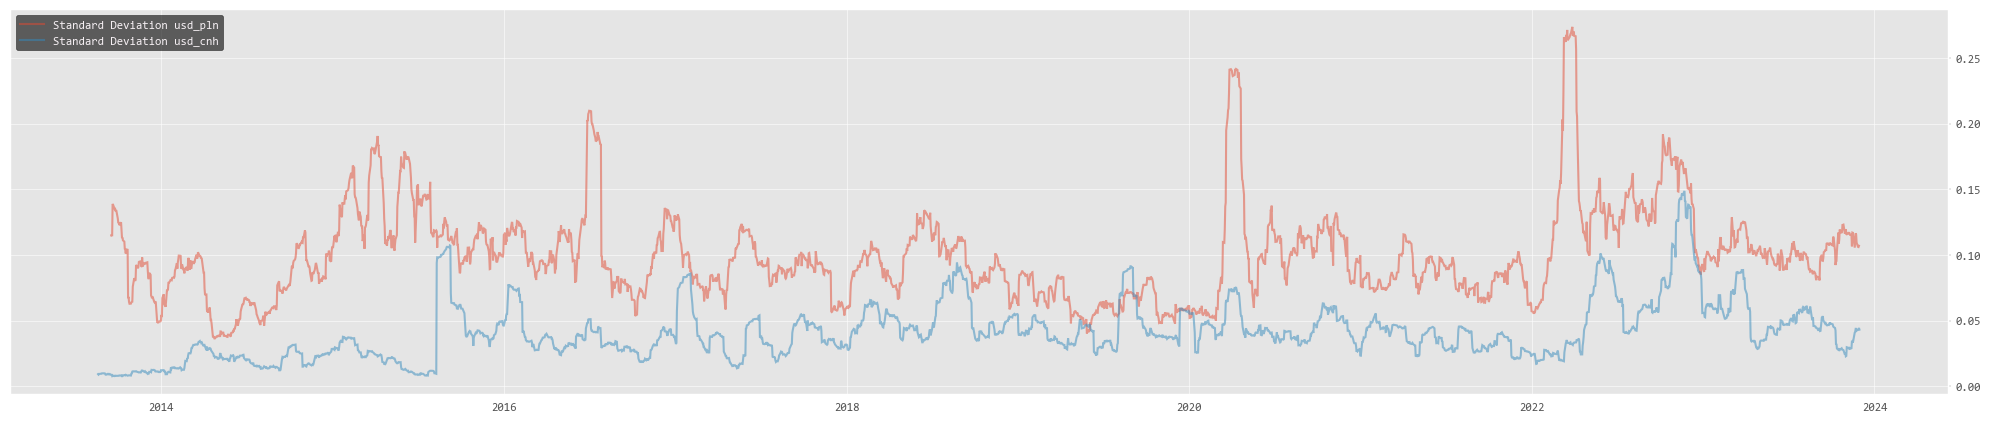

In [159]:
fig, ax1 = plt.subplots(figsize=(25, 5))
plt.plot(usd_pln["std"], alpha=0.5, label="Standard Deviation usd_pln")
#plt.plot(eur_usd["std"], alpha=0.5, label="Standard Deviation eur_usd")
#plt.plot(eur_pln["std"], alpha=0.5, label="Standard Deviation eur_pln")
plt.plot(usd_cnh["std"], alpha=0.5, label="Standard Deviation usd_cnh")
#plt.plot(usd_cny["std"], label="Standard Deviation usd_cny")
plt.legend();

In [440]:
spread_vol_50 = spread.rolling(window = 22).std().dropna() * np.sqrt(252)
#spread_vol_50= spread_vol_50 * np.sqrt(252/22)

In [441]:
df_corr = pd.merge(usd_cnh1["std"],spread_vol_50, left_index=True, right_index=True, how='inner' )

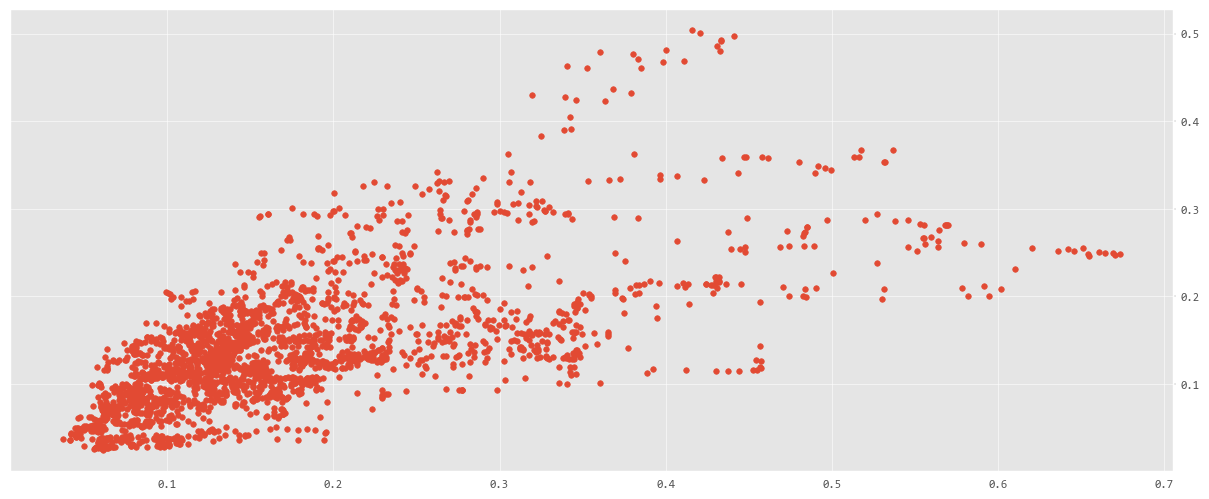

In [443]:
plt.scatter(x = df_corr["Close"], y = df_corr["std"])

In [445]:
correlation = df_corr["std"].corr(df_corr["Close"])
correlation

0.664165539007917

### IR

In [374]:
IR = pd.read_excel("C:/Users/anton/Documents/data/China/Loan_Prime_Rate.xlsx")
IR = IR[["1Y", "Date"]]
IR["Date"] = pd.to_datetime(IR["Date"], errors='coerce')
IR.index = IR["Date"]
IR = IR[["1Y"]]
IR = IR.iloc[:-1,:]
IR = IR[::-1]
IR["1Y"] = pd.to_numeric(IR["1Y"])
IR.head()

,1Y
Date,
2013-10-25,5.71
2013-10-28,5.72
2013-10-29,5.72
2013-10-30,5.72
2013-10-31,5.72


In [345]:
US_rate = openbb.fixedincome.fed("daily")

INFO:openbb_terminal.fixedincome.fred_model:START
INFO:openbb_terminal.fixedincome.fred_model:{"INPUT": {"parameter": "daily", "start_date": "None", "end_date": "None", "overnight": "False", "quantiles": "False", "target": "False", "chart": "False"}, "VIRTUAL_PATH": "fixedincome.fed", "CHART": false}
INFO:openbb_terminal.fixedincome.fred_model:START
INFO:openbb_terminal.fixedincome.fred_model:END
INFO:openbb_terminal.fixedincome.fred_model:END


In [354]:
US_rate_filtered = US_rate[US_rate.index >= "2013-11-01"]

In [364]:
IR_temp = IR[IR.index >= "2013-11-01"]
df_merged = pd.merge(US_rate_filtered,IR_temp, left_index=True, right_index=True, how='inner' )
ir_spread = df_merged["DFF"] - df_merged["1Y"]

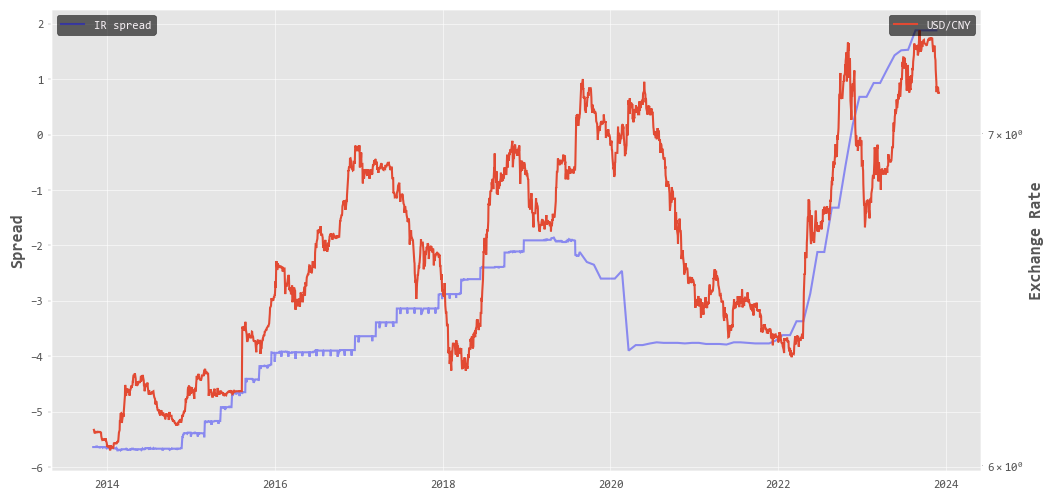

In [375]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(ir_spread, label='IR spread', color = "blue", alpha =0.4)
ax1.set_ylabel('Spread') #, color='blue'
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_yscale('log')

ax2.plot(usd_cny[usd_cny.index > "2013-11-01"]["Close"], label="USD/CNY")
ax2.set_ylabel('Exchange Rate')
ax2.tick_params(axis='y') #, labelcolor='green'
ax2.legend(loc='upper right');

INFO:openbb_terminal.economy.yfinance_model:START
INFO:openbb_terminal.economy.yfinance_model:{"INPUT": {"interval": "1d", "start_date": "None", "end_date": "None", "column": "Adj Close", "returns": "False", "indices": "['000300.SS']", "chart": "False"}, "VIRTUAL_PATH": "economy.index", "CHART": false}
INFO:openbb_terminal.economy.yfinance_model:START
INFO:openbb_terminal.economy.yfinance_model:START


INFO:openbb_terminal.economy.yfinance_model:END
INFO:openbb_terminal.economy.yfinance_model:END
INFO:openbb_terminal.economy.yfinance_model:END


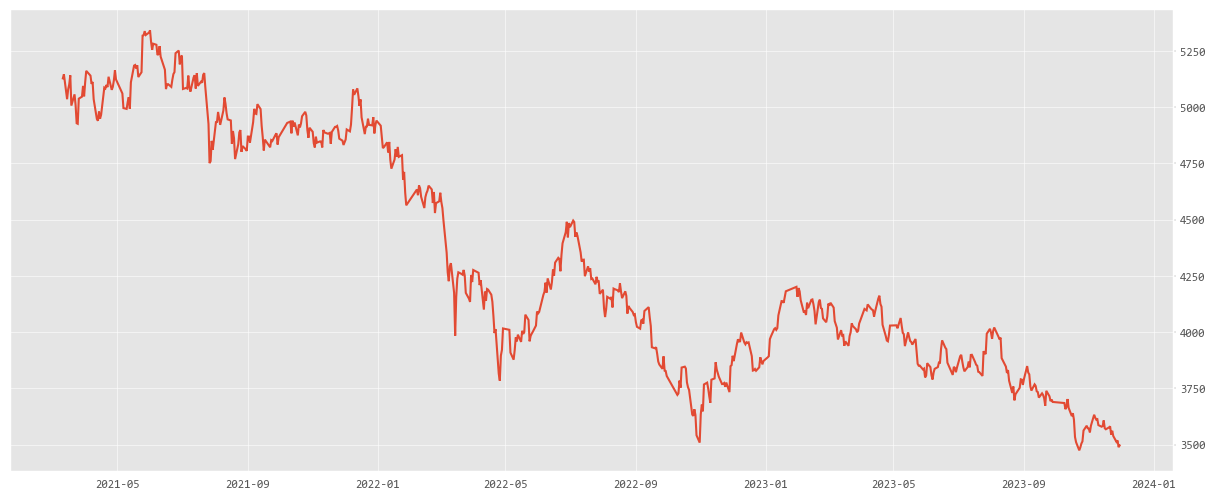

In [170]:
plt.plot(openbb.economy.index(['000300.SS']))

INFO:openbb_terminal.economy.yfinance_model:START
INFO:openbb_terminal.economy.yfinance_model:{"INPUT": {"interval": "1d", "start_date": "None", "end_date": "None", "column": "Adj Close", "returns": "False", "indices": "['^HSCC']", "chart": "False"}, "VIRTUAL_PATH": "economy.index", "CHART": false}
INFO:openbb_terminal.economy.yfinance_model:START
INFO:openbb_terminal.economy.yfinance_model:START
INFO:openbb_terminal.economy.yfinance_model:END
INFO:openbb_terminal.economy.yfinance_model:END
INFO:openbb_terminal.economy.yfinance_model:END


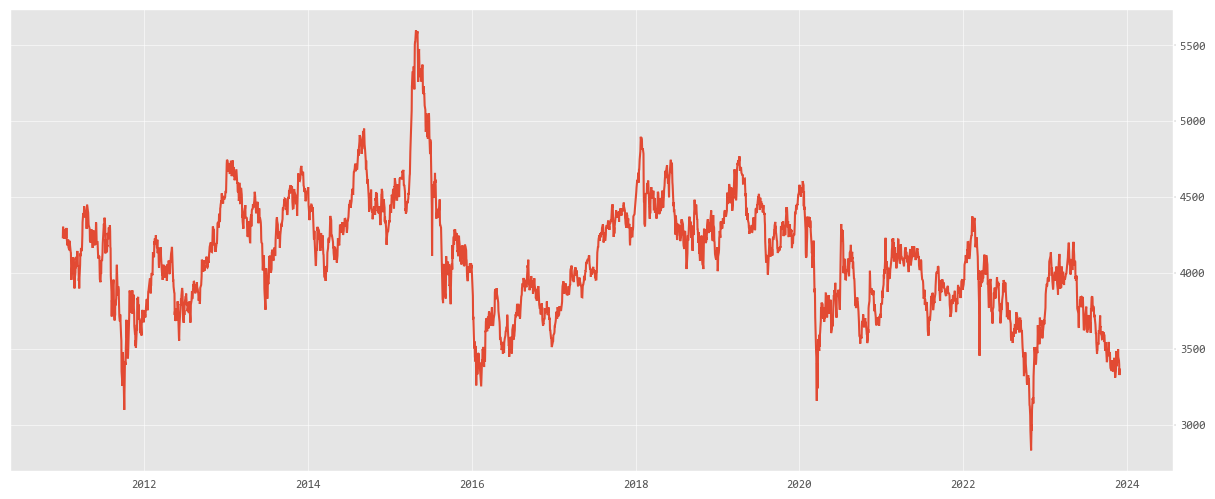

In [171]:
plt.plot(openbb.economy.index(['^HSCC']))

In [394]:
cpi_china = openbb.economy.cpi(["china"])
ccpi_china = openbb.economy.ccpi(["china"])

INFO:openbb_terminal.economy.fred_model:START
INFO:openbb_terminal.economy.fred_model:START
INFO:openbb_terminal.economy.fred_model:END
INFO:openbb_terminal.economy.fred_model:END
INFO:openbb_terminal.economy.oecd_model:START
INFO:openbb_terminal.economy.oecd_model:{"INPUT": {"perspective": "TOT", "frequency": "Q", "units": "AGRWTH", "start_date": "", "end_date": "", "countries": "['china']", "chart": "False"}, "VIRTUAL_PATH": "economy.ccpi", "CHART": false}
INFO:openbb_terminal.economy.oecd_model:START
INFO:openbb_terminal.economy.oecd_model:END
INFO:openbb_terminal.economy.oecd_model:END


In [398]:
cpi_china.index = pd.to_datetime(cpi_china.index)

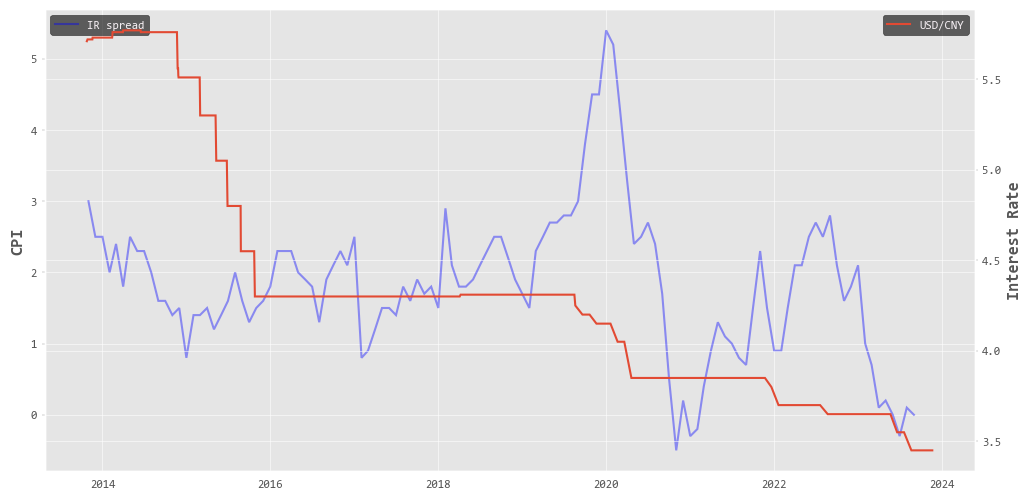

In [399]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(cpi_china[cpi_china.index >="2013-10-25"], label='IR spread', color = "blue", alpha =0.4)
ax1.set_ylabel('CPI') #, color='blue'
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(IR, label="USD/CNY")
ax2.set_ylabel('Interest Rate')
ax2.tick_params(axis='y') #, labelcolor='green'
ax2.legend(loc='upper right');